# INTRODUCTION
This project implements a spam email detection model using Logistic Regression, a supervised machine learning algorithm commonly applied to binary classification problems. The goal is to automatically classify incoming messages as either spam (1) or not spam (0).

Steps for Prediction

Import libraries: NumPy for building NumPy arrays, and Pandas for creating a DataFrame.

Train-test split: Use this to split the data into training and testing sets.

TF-IDF Vectorizer: Convert text data into numerical values for the model to understand.

Logistic Regression: Classify the mail.

Accuracy score: Evaluate how the model is performing and how many predictions it made.

 Logistic Regression is a supervised machine learning algorithm used for classification problems.
 It is used for binary classification where the output can be one of two possible categories such as Yes/No, True/False or 0/1. 


# Importing libraries

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Data collection and preprocessing

In [2]:
# 1. Load dataset 
spam_data = pd.read_csv("spam.csv")
spam_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


#  EDA (Exploratory Data Analysis)

In [3]:
# check first five rows
spam_data.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
spam_data.columns

Index(['Category', 'Message'], dtype='object')

In [5]:
# check no of rows and columns
spam_data.shape

(5572, 2)

In [6]:
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
#Check for null values
spam_data.isnull().sum()

Category    0
Message     0
dtype: int64

In [8]:
print(spam_data["Category"].value_counts())


Category
ham     4825
spam     747
Name: count, dtype: int64


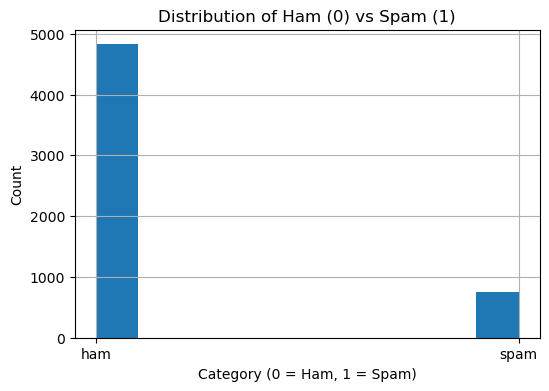

In [9]:
##  Distribution of labels

import matplotlib.pyplot as plt

spam_data["Category"].hist(figsize=(6,4))
plt.xlabel("Category (0 = Ham, 1 = Spam)")
plt.ylabel("Count")
plt.title("Distribution of Ham (0) vs Spam (1)")
plt.show()


# Label Encoding -
## take labels and convert to numerical  for machine learning model to understand
## spam as 0
## ham as 1

In [10]:
spam_data.loc[spam_data['Category'] == 'spam', 'Category'] = 0
spam_data.loc[spam_data['Category'] == 'ham', 'Category'] = 1


In [11]:
spam_data

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


# Separting data as texts and labels
# y-labels
# x-text(messages)

In [13]:
# Labels (0 = spam, 1 = ham)
y = spam_data['Category']

# Messages (text data)
X = spam_data['Message']


In [14]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [15]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object

In [16]:
# Split into train (80%) and test (20%)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=3
)


In [17]:
X.shape

(5572,)

In [18]:
X_train.shape

(4457,)

In [19]:
y_train.shape

(4457,)

In [20]:
X_test.shape

(1115,)

# Feature Extraction 
## convert text data into meaningful numerical values

In [22]:
#transform the text data to feature vectors that can be used as input to the logistic model
# Transform the text data to feature vectors that can be used as input to the Logistic Regression model
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

# Fit and transform the training data, and transform the test data
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# Convert labels to integers
y_train = y_train.astype('int')
y_test = y_test.astype('int')


# Training the Model
## Logistic model

In [35]:
# Training the model
# Logistic Regression
#Load the model
model = LogisticRegression()

# training the logistic regression model with training data
model.fit(X_train_features, y_train)

LogisticRegression()

## Evaluating the  trained Model

In [31]:
# prediction on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

print('Accuracy on training data :', accuracy_on_training_data)

Accuracy on training data : 0.9676912721561588


In [32]:
# prediction on test data
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

print('Accuracy on test data :', accuracy_on_test_data)

Accuracy on test data : 0.9668161434977578


# Building a Predictive System

In [34]:
# Building a Predictive System
input_mail = ["I've been searching for the right words to thank you for last breather. I promise i wont take your help for granted and will fulfill my promise. You have been a great help to me." ]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction
prediction = model.predict(input_data_features)

print(prediction)

[1]
